<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DGarcia-A01086411/blob/main/Actividad_Semana_7_6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#David Eduardo Garcia Reyes - A01086411

##Actividad Semana 7 - 6 Visualización

#**Actividades**
#1. Descarga los datos y carga el dataset en tu notebook
#2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head( ), dtypes, info( ), isna( ).
#3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.
#4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.
#5. Realiza el conteo de las variables categóricas.
#6. Escala los datos, si consideras necesario.
#7. Reduce las dimensiones con PCA, si consideras necesario. 
#8. Elabora los histogramas de los atributos para visualizar su distribución.
#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
#10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [1]:
#1. Descarga los datos y carga el dataset en tu notebook

In [2]:
#Importar librerias necesarias para la Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [4]:
#Cargar base de datos a dataframe
path= "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df=pd.read_csv(path, index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
#Renombrar columnas para una mejor identificacion
df.rename(columns = {"X1":"Credit","X2":"Gender","X3":"Education","X4":"M.Status","X5":"Age","X6":"RP Sep-05","X7":"RP Aug-05","X8":"RP Jul-05","X9":"RP Jun-05","X10":"RP May-05","X11":"RP Apr-05","X12":"BS Sep-05","X13":"BS Aug-05","X14":"BS Jul-05","X15":"BS Jun-05","X16":"BS May-05","X17":"BS Apr-05","X18":"PP Sep-05","X19":"PP Aug-05","X20":"PP Jul-05","X21":"PP Jun-05","X22":"PP May-05","X23":"PP Apr-05"},inplace = True)
df

,Credit,Gender,Education,M.Status,Age,RP Sep-05,RP Aug-05,RP Jul-05,RP Jun-05,RP May-05,...,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [6]:
#2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head( ), dtypes, info( ), isna( ).

In [9]:
df.shape

(30000, 24)

In [10]:
df.columns

Index(['Credit', 'Gender', 'Education', 'M.Status', 'Age', 'RP Sep-05',
       'RP Aug-05', 'RP Jul-05', 'RP Jun-05', 'RP May-05', 'RP Apr-05',
       'BS Sep-05', 'BS Aug-05', 'BS Jul-05', 'BS Jun-05', 'BS May-05',
       'BS Apr-05', 'PP Sep-05', 'PP Aug-05', 'PP Jul-05', 'PP Jun-05',
       'PP May-05', 'PP Apr-05', 'Y'],
      dtype='object')

In [11]:
df.head()

,Credit,Gender,Education,M.Status,Age,RP Sep-05,RP Aug-05,RP Jul-05,RP Jun-05,RP May-05,...,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [12]:
df.dtypes

Credit         int64
Gender       float64
Education    float64
M.Status     float64
Age          float64
RP Sep-05    float64
RP Aug-05    float64
RP Jul-05    float64
RP Jun-05    float64
RP May-05    float64
RP Apr-05    float64
BS Sep-05    float64
BS Aug-05    float64
BS Jul-05    float64
BS Jun-05    float64
BS May-05    float64
BS Apr-05    float64
PP Sep-05    float64
PP Aug-05    float64
PP Jul-05    float64
PP Jun-05    float64
PP May-05    float64
PP Apr-05    float64
Y            float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Credit     30000 non-null  int64  
 1   Gender     29999 non-null  float64
 2   Education  29998 non-null  float64
 3   M.Status   29998 non-null  float64
 4   Age        29995 non-null  float64
 5   RP Sep-05  29997 non-null  float64
 6   RP Aug-05  29995 non-null  float64
 7   RP Jul-05  29993 non-null  float64
 8   RP Jun-05  29991 non-null  float64
 9   RP May-05  29984 non-null  float64
 10  RP Apr-05  29986 non-null  float64
 11  BS Sep-05  29989 non-null  float64
 12  BS Aug-05  29989 non-null  float64
 13  BS Jul-05  29987 non-null  float64
 14  BS Jun-05  29985 non-null  float64
 15  BS May-05  29983 non-null  float64
 16  BS Apr-05  29990 non-null  float64
 17  PP Sep-05  29992 non-null  float64
 18  PP Aug-05  29991 non-null  float64
 19  PP Jul-05  29992 non-null  float64
 20  PP Jun

In [14]:
df.isna()

,Credit,Gender,Education,M.Status,Age,RP Sep-05,RP Aug-05,RP Jul-05,RP Jun-05,RP May-05,...,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
#3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [16]:
#Encontrar columnas donde existan registros nulos
df.isnull().any()

Credit       False
Gender        True
Education     True
M.Status      True
Age           True
RP Sep-05     True
RP Aug-05     True
RP Jul-05     True
RP Jun-05     True
RP May-05     True
RP Apr-05     True
BS Sep-05     True
BS Aug-05     True
BS Jul-05     True
BS Jun-05     True
BS May-05     True
BS Apr-05     True
PP Sep-05     True
PP Aug-05     True
PP Jul-05     True
PP Jun-05     True
PP May-05     True
PP Apr-05     True
Y             True
dtype: bool

In [17]:
#Se procede a eliminar filas con valores nulos
df.dropna(inplace=True)
df

,Credit,Gender,Education,M.Status,Age,RP Sep-05,RP Aug-05,RP Jul-05,RP Jun-05,RP May-05,...,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [18]:
#Se eliminaron solo 42 filas

In [19]:
#Se valida que ya no existan valores nulos
df.isnull().any()

Credit       False
Gender       False
Education    False
M.Status     False
Age          False
RP Sep-05    False
RP Aug-05    False
RP Jul-05    False
RP Jun-05    False
RP May-05    False
RP Apr-05    False
BS Sep-05    False
BS Aug-05    False
BS Jul-05    False
BS Jun-05    False
BS May-05    False
BS Apr-05    False
PP Sep-05    False
PP Aug-05    False
PP Jul-05    False
PP Jun-05    False
PP May-05    False
PP Apr-05    False
Y            False
dtype: bool

In [20]:
#4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [21]:
df.describe()

,Credit,Gender,Education,M.Status,Age,RP Sep-05,RP Aug-05,RP Jul-05,RP Jun-05,RP May-05,...,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [24]:
#Se quitan las variables categoricas para poder obtener la correlacion
df=df.drop(columns=['Gender','Education','M.Status',"RP Sep-05","RP Aug-05","RP Jul-05","RP Jun-05","RP May-05","RP Apr-05",'Y'])

In [35]:
df.corr()

,Credit,Age,BS Sep-05,BS Aug-05,BS Jul-05,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05
Credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
BS Sep-05,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
BS Aug-05,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
BS Jul-05,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
BS Jun-05,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
BS May-05,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
BS Apr-05,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
PP Sep-05,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
PP Aug-05,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


In [36]:
# Importar librerias de sklearn, matplotlib y seaborn
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df

,Credit,Age,BS Sep-05,BS Aug-05,BS Jul-05,BS Jun-05,BS May-05,BS Apr-05,PP Sep-05,PP Aug-05,PP Jul-05,PP Jun-05,PP May-05,PP Apr-05
ID,,,,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [42]:
#6. Escala los datos si lo consideras necesario, 7. Reduce las dimensiones con PCA si lo consideras necesario

In [39]:
# Se procede a realizar la normalización de los datos
pcs = PCA()
pcs.fit(preprocessing.scale(df))

PCA()

In [40]:
# Creación de dataframe con resumen de cálculos de PCA
summary={'Standard deviation':np.sqrt(pcs.explained_variance_),
         'Proportion of variance':pcs.explained_variance_ratio_,
         'Cumulative proportion':np.cumsum(pcs.explained_variance_ratio_)
}
summary
pcsSummary=pd.DataFrame(summary).transpose()
pcsSummary=pcsSummary.round(3)
pcsSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.433,1.310,1.022,0.962,0.940,0.934,0.883,0.852,0.841,0.514,0.266,0.203,0.159,0.152
Proportion of variance,0.423,0.123,0.075,0.066,0.063,0.062,0.056,0.052,0.051,0.019,0.005,0.003,0.002,0.002
Cumulative proportion,0.423,0.545,0.620,0.686,0.749,0.812,0.867,0.919,0.970,0.989,0.994,0.997,0.998,1.000


In [41]:
#Operación para renombrar columnas como componentes PC**
pcsSummary.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary.columns)+1) ]
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.433,1.310,1.022,0.962,0.940,0.934,0.883,0.852,0.841,0.514,0.266,0.203,0.159,0.152
Proportion of variance,0.423,0.123,0.075,0.066,0.063,0.062,0.056,0.052,0.051,0.019,0.005,0.003,0.002,0.002
Cumulative proportion,0.423,0.545,0.620,0.686,0.749,0.812,0.867,0.919,0.970,0.989,0.994,0.997,0.998,1.000


In [53]:
# Con la informacion de la grafica e informacion de desviacion estandar, proporcion de la varianza y proporcion acumulada se obtiene que la canditad optima de componentes es hasta PC8
# ya que representa el 91.9% de la variabilidad
pcsSummary.iloc[2,7]

0.919

In [57]:
# Se obtiene la matriz transpuesta de los componentes con las variables/columnas
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary.columns,
                                index=df.iloc[:, 0:].columns
                                ).abs()
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Credit,0.165507,0.300709,0.378575,0.200103,0.035312,0.078883,0.111239,0.046381
Age,0.032789,0.071906,0.869471,0.338990,0.039760,0.071461,0.078816,0.027368
BS Sep-05,0.372446,0.190793,0.034207,0.063899,0.041391,0.043987,0.008169,0.009341
BS Aug-05,0.383253,0.174644,0.001814,0.007629,0.083164,0.028824,0.032444,0.135636
BS Jul-05,0.388264,0.126883,0.034747,0.060528,0.113790,0.099239,0.121162,0.093077
BS Jun-05,0.391557,0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157
BS May-05,0.388505,0.105928,0.033882,0.039553,0.106756,0.099290,0.007584,0.049781
BS Apr-05,0.380672,0.094157,0.018489,0.070616,0.164986,0.069272,0.007892,0.000282
PP Sep-05,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,0.201646,0.748694
PP Aug-05,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,0.278835,0.578491


In [59]:
#8. Elabora los histogramas de los atributos para visualizar su distribución.

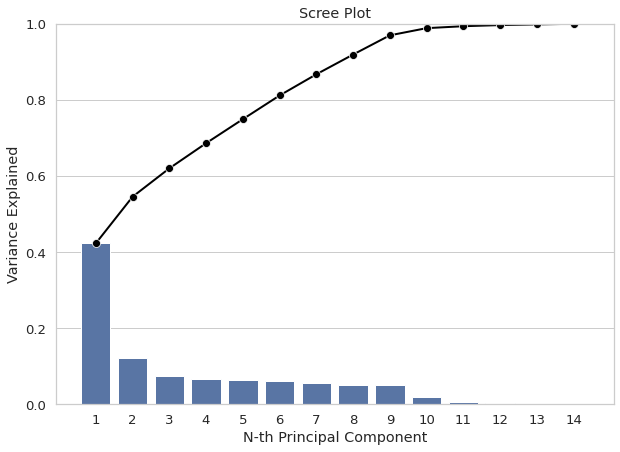

In [63]:
# Se realiza la Scree Plot
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [60]:
#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [61]:
# En una variable x se almacenan los nombres de las columnas para poder graficarlas con scatterplot
x = pcsComponents_df.index
x = x.to_list()
x

['Credit',
 'Age',
 'BS Sep-05',
 'BS Aug-05',
 'BS Jul-05',
 'BS Jun-05',
 'BS May-05',
 'BS Apr-05',
 'PP Sep-05',
 'PP Aug-05',
 'PP Jul-05',
 'PP Jun-05',
 'PP May-05',
 'PP Apr-05']

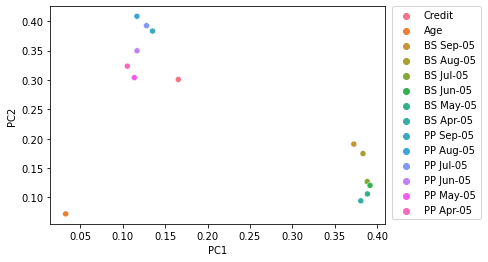

In [62]:
# Se obtiene la grafica scatterplot de los 2 primeros componentes PC1 y PC2
sns.scatterplot(data=pcsComponents_df, x="PC1", y="PC2", hue=pcsComponents_df.index)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

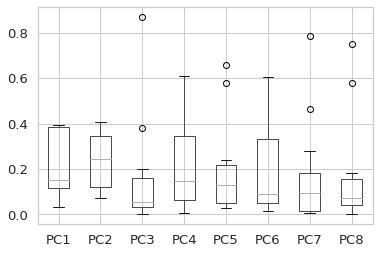

In [64]:
#Box plot
from seaborn.categorical import boxplot
boxplot=pcsComponents_df.iloc[:,:8]
boxplot.boxplot()

In [ ]:
#10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones

In [ ]:
#Scatterplot
#Nos muestra cuales son las variables que tienen mayor asociacion con los componentes principales

In [ ]:
#Box Plot
#Nos indica de manera clara en que componentes se encuentran los valores atipicos